In [192]:
import pandas as pd
import os
import numpy as np
import FlowCal
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
#import fcsparser

In [146]:
path_main='./Project_Main/Dane_Rathi_Ankit/'
path_list=[]
for i in os.listdir(path_main):
    path_list.append(path_main+i)
path_list=sorted(path_list)
columns_keep=['Ba130Di','Ba132Di', 'Ba134Di',
 'Ba135Di', 'Ba136Di', 'Ba137Di', 'Ba138Di', 'Bi209Di', 'Ce140Di', 'Dy161Di',
 'Dy163Di', 'Dy164Di', 'Er166Di', 'Er168Di', 'Er170Di', 'Eu151Di', 'Eu153Di', 'Gd155Di',
 'Gd156Di', 'Gd158Di', 'Gd160Di', 'Ho165Di', 'Ir191Di', 'Ir193Di', 'La139Di', 'Lu175Di', 'Nd142Di',
 'Nd144Di', 'Nd145Di', 'Nd146Di', 'Nd148Di',
 'Pd102Di', 'Pd104Di', 'Pd105Di', 'Pd106Di', 'Pd108Di', 'Pd110Di', 'Pr141Di', 'Sm147Di', 'Sm149Di', 'Sm152Di',
 'Tb159Di', 'Tm169Di', 'Y89Di', 'Yb171Di', 'Yb172Di', 'Yb173Di', 'Yb174Di', 'Yb176Di',]

In [151]:
df=pd.DataFrame()
for path in path_list:
    s =FlowCal.io.FCSData(path)
    #df_s=pd.DataFrame(s,columns=s.channels)
    #meta, s = fcsparser.parse(path_list[5], meta_data_only=False, reformat_meta=False)

    df_s=pd.DataFrame(np.array(s).byteswap().newbyteorder(),columns=s.channels)
    print(path)
    print(df_s.shape)
    print(set(df_s.columns).difference(set(columns_keep)))
    df_s=df_s[columns_keep]
    df=pd.concat([df,df_s],0)
    print(df.shape)

./Project_Main/Dane_Rathi_Ankit/Sample1_Healthy_UNS.fcs
(362901, 52)
{'Event_length', 'Time', 'SampleID'}
(362901, 49)
./Project_Main/Dane_Rathi_Ankit/Sample1_TB_UNS.fcs
(377264, 52)
{'Event_length', 'Time', 'SampleID'}
(740165, 49)
./Project_Main/Dane_Rathi_Ankit/Sample2_Healthy_UNS.fcs
(328474, 51)
{'Event_length', 'Time'}
(1068639, 49)
./Project_Main/Dane_Rathi_Ankit/Sample2_TB_UNS.fcs
(137270, 51)
{'Event_length', 'Time'}
(1205909, 49)
./Project_Main/Dane_Rathi_Ankit/Sample3_Healthy_UNS.fcs
(114637, 51)
{'Event_length', 'Time'}
(1320546, 49)
./Project_Main/Dane_Rathi_Ankit/Sample3_TB_UNS.fcs
(67964, 51)
{'Event_length', 'Time'}
(1388510, 49)
./Project_Main/Dane_Rathi_Ankit/Sample4_Healthy_UNS.fcs
(172968, 52)
{'Event_length', 'Time', 'SampleID'}
(1561478, 49)
./Project_Main/Dane_Rathi_Ankit/Sample4_TB_UNS.fcs
(107204, 52)
{'Event_length', 'Time', 'SampleID'}
(1668682, 49)
./Project_Main/Dane_Rathi_Ankit/Sample5_Healthy_UNS.fcs
(182502, 52)
{'Event_length', 'Time', 'SampleID'}
(1851

In [156]:
print(df.shape)
print(df.isnull().sum())
df.sample(1)

(3104473, 49)
Ba130Di    0
Ba132Di    0
Ba134Di    0
Ba135Di    0
Ba136Di    0
Ba137Di    0
Ba138Di    0
Bi209Di    0
Ce140Di    0
Dy161Di    0
Dy163Di    0
Dy164Di    0
Er166Di    0
Er168Di    0
Er170Di    0
Eu151Di    0
Eu153Di    0
Gd155Di    0
Gd156Di    0
Gd158Di    0
Gd160Di    0
Ho165Di    0
Ir191Di    0
Ir193Di    0
La139Di    0
Lu175Di    0
Nd142Di    0
Nd144Di    0
Nd145Di    0
Nd146Di    0
Nd148Di    0
Pd102Di    0
Pd104Di    0
Pd105Di    0
Pd106Di    0
Pd108Di    0
Pd110Di    0
Pr141Di    0
Sm147Di    0
Sm149Di    0
Sm152Di    0
Tb159Di    0
Tm169Di    0
Y89Di      0
Yb171Di    0
Yb172Di    0
Yb173Di    0
Yb174Di    0
Yb176Di    0
dtype: int64


,Ba130Di,Ba132Di,Ba134Di,Ba135Di,Ba136Di,Ba137Di,Ba138Di,Bi209Di,Ce140Di,Dy161Di,...,Sm149Di,Sm152Di,Tb159Di,Tm169Di,Y89Di,Yb171Di,Yb172Di,Yb173Di,Yb174Di,Yb176Di
356842,0.0,7.398203,2.801283,12.587958,52.481136,23.627996,240.446716,37.913368,12108.701172,0.0,...,0.0,0.428878,0.0,0.0,132.364471,0.435866,0.0,0.0,1.023376,0.185069


In [ ]:
#using min-max scaler 

In [159]:

scaler = MinMaxScaler()
X=scaler.fit_transform(df)

In [167]:
#df_1=pd.DataFrame(X,columns=df.columns)

In [169]:
#df_1.isnull().sum()

Ba130Di    0
Ba132Di    0
Ba134Di    0
Ba135Di    0
Ba136Di    0
Ba137Di    0
Ba138Di    0
Bi209Di    0
Ce140Di    0
Dy161Di    0
Dy163Di    0
Dy164Di    0
Er166Di    0
Er168Di    0
Er170Di    0
Eu151Di    0
Eu153Di    0
Gd155Di    0
Gd156Di    0
Gd158Di    0
Gd160Di    0
Ho165Di    0
Ir191Di    0
Ir193Di    0
La139Di    0
Lu175Di    0
Nd142Di    0
Nd144Di    0
Nd145Di    0
Nd146Di    0
Nd148Di    0
Pd102Di    0
Pd104Di    0
Pd105Di    0
Pd106Di    0
Pd108Di    0
Pd110Di    0
Pr141Di    0
Sm147Di    0
Sm149Di    0
Sm152Di    0
Tb159Di    0
Tm169Di    0
Y89Di      0
Yb171Di    0
Yb172Di    0
Yb173Di    0
Yb174Di    0
Yb176Di    0
dtype: int64

In [206]:
#arc sin transfromation
X=np.arcsin(X)

In [ ]:
#Using PCA to compress the dimensions

In [207]:
pca = PCA()
X_1=pca.fit_transform(X)


             0
0    62.428332
1    73.188826
2    79.716505
3    85.117325
4    89.614157
5    92.953961
6    94.249296
7    95.230738
8    95.792496
9    96.288130
10   96.742425
11   97.054463
12   97.345481
13   97.624559
14   97.864793
15   98.093022
16   98.311238
17   98.515644
18   98.686869
19   98.837487
20   98.961461
21   99.078621
22   99.183244
23   99.280031
24   99.370452
25   99.450684
26   99.522802
27   99.589304
28   99.638064
29   99.683644
30   99.725304
31   99.760263
32   99.794555
33   99.827452
34   99.858753
35   99.885301
36   99.910385
37   99.930862
38   99.950045
39   99.963700
40   99.972847
41   99.981481
42   99.986377
43   99.990329
44   99.993540
45   99.996231
46   99.998215
47   99.999176
48  100.000000


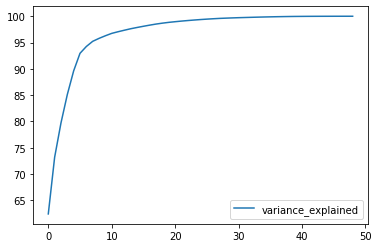

In [208]:
print(pd.DataFrame(100*np.cumsum(pca.explained_variance_ratio_)))
pd.DataFrame(100*np.cumsum(pca.explained_variance_ratio_),columns=['variance_explained']).plot()

In [ ]:
#Top 15 components explain  97.864793 % of variance

In [209]:
pca = PCA(n_components=15)
X_1=pca.fit_transform(X)

In [210]:
print(pd.DataFrame(100*np.cumsum(pca.explained_variance_ratio_)))

            0
0   62.428332
1   73.188826
2   79.716505
3   85.117325
4   89.614157
5   92.953961
6   94.249296
7   95.230738
8   95.792496
9   96.288130
10  96.742425
11  97.054460
12  97.345476
13  97.624553
14  97.864776


In [211]:
#Fitting K-Means
range_n_clusters = np.arange(2,9,1)
elbow = []
ss = []
#df1 = embeddings_bert_lda
for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    print(n_clusters)
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_1)
    #Finding the average silhouette score
    #silhouette_avg = silhouette_score(X_1, cluster_labels)
    #ss.append(silhouette_avg)
    #print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    #Finding the average SSE"
    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

# fig.add_subplot(122)
# plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
# plt.xlabel("Number of cluster")
# plt.ylabel("Silhouette Score")
# plt.legend()
# plt.show()

2
3
4
5
6
7
8


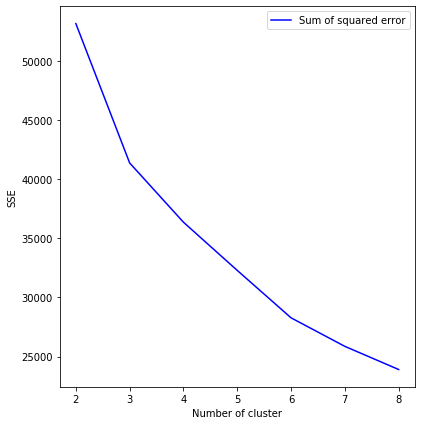

In [212]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()

In [213]:
#chosing 6 clusters
n_clusters=6
#iterating through cluster sizes
print(n_clusters)
clusterer = KMeans(n_clusters = n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X_1)

6


In [219]:
df['cluster_label']=cluster_labels

In [239]:
df.to_csv('data_with_clusters.csv',index=False)

In [233]:
!pip uninstall umap -y

Uninstalling umap-0.1.1:
  Successfully uninstalled umap-0.1.1


In [234]:
!pip install umap-learn


     |████████████████████████████████| 71kB 76kB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 678kB/s eta 0:00:01
     |████████████████████████████████| 18.4MB 5.3MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.4.6-cp37-none-any.whl size=67951 sha256=2569b8c4f9ce4cec3f679fca6f3a22aafea1bb3e2345b2aee20dfe5cb4dd1ee7
  Stored in directory: /Users/jauharim/Library/Caches/pip/wheels/7d/1d/03/34aade9a9b97acddb8e93654eb856dadbf0964406eef8b96e2
Successfully built umap-learn
  Found existing installation: llvmlite 0.29.0
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
#Don't read below this

In [129]:
df_s.shape

(235420, 49)

In [132]:
np.max(df_s['Ba134Di'])

1596.3265380859375

In [ ]:
# try:
#     df_s=df_s.drop('SampleID',1)
# except:
#     print('sample id was not present')

In [97]:
df_s

,Ba130Di,Ba132Di,Ba134Di,Ba135Di,Ba136Di,Ba137Di,Ba138Di,Bi209Di,Ce140Di,Dy161Di,...,Sm149Di,Sm152Di,Tb159Di,Tm169Di,Y89Di,Yb171Di,Yb172Di,Yb173Di,Yb174Di,Yb176Di
0,0.116391,0.043177,15.714767,36.055271,44.795597,54.101639,354.477905,104.391579,787.279724,4.696529,...,12.007200,3.248522,12.213863,0.824716,244.982483,11.558786,1.772067,13.276553,167.517944,8.957319
1,0.000000,0.000000,2.333349,2.023951,3.409920,0.000000,16.113514,59.026077,4.071712,14.146554,...,3.561555,0.000000,1.795888,2.583789,206.376480,7.933512,14.107116,12.893358,20.864838,6.588449
2,0.357182,5.354287,0.826297,7.424251,4.912556,1.538449,34.701256,84.588585,17.966005,0.606728,...,0.000000,3.080777,5.831239,1.253338,116.918571,5.893589,0.000000,11.580085,70.324585,1.466464
3,0.000000,0.000000,0.541096,0.000000,2.851309,2.851408,12.844688,63.667107,10.164993,0.505030,...,0.037138,0.000000,5.570735,4.416134,115.263718,7.750714,1.525529,20.048733,84.462234,3.973290
4,0.000000,0.000000,0.023378,1.010205,4.061093,2.788786,35.167439,93.257439,7.875116,0.189044,...,0.000000,0.021410,3.579786,3.397989,75.390556,9.622637,0.656366,10.322533,77.975990,1.405165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235415,0.000000,1.141685,2.271805,2.639798,4.187185,3.868012,34.734409,24.235722,5.018671,0.000000,...,2.035313,0.058907,2.937473,0.000000,106.233521,4.039288,2.183800,0.000000,151.975967,1.561469
235416,0.000000,0.000000,1.935500,0.554796,14.086151,8.852049,26.438011,27.220554,696.798035,0.471833,...,8.966029,0.968386,0.000000,0.953140,78.428146,12.173205,1.707253,8.851733,56.498219,1.766774
235417,0.300467,0.000000,3.636925,11.383309,7.527400,12.653099,83.044617,93.963814,57.301674,0.929788,...,0.364346,21.563347,2.374395,0.000000,57.556778,4.038062,0.949627,0.533694,44.949249,5.159438
235418,0.000000,0.000000,0.000000,4.314469,2.902569,6.109064,54.402615,71.243073,4.163957,7.152690,...,0.000000,0.000000,12.569806,1.511403,64.014397,0.781805,2.467875,0.000000,78.056183,29.351923
